In [21]:
# cell 1: Read data file from data file

import pandas as pd

df_ads = pd.read_csv('易速鲜花微信软文.csv')
df_ads.head()

,点赞数,转发数,热度指数,文章评级,浏览量
0,2646,1347.0,7,5,260004
1,816,816.0,4,6,100004
2,1224,612.0,6,5,164502
3,1261,1261.0,6,6,163001
4,1720,1720.0,7,5,260401


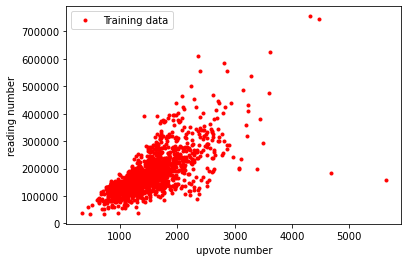

In [10]:
# cell 2: Visualize the data

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

plt.plot(df_ads['点赞数'], df_ads['浏览量'], 'r.', label='Training data')
plt.xlabel('upvote number')
plt.ylabel('reading number')
plt.legend()
plt.show()

<AxesSubplot:xlabel='hot index', ylabel='reading number'>

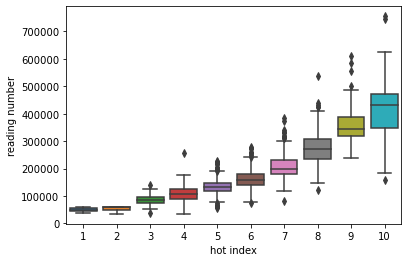

In [16]:
# cell 3: Draw the boxplot

data = pd.concat([df_ads['浏览量'], df_ads['热度指数']], axis=1)
data = data.rename(columns={'浏览量': 'reading number', '热度指数': 'hot index'})
sns.boxplot(x='hot index', y='reading number', data=data)

In [22]:
# cell 4: Check the null values.

df_ads.isna().sum()

点赞数      0
转发数     37
热度指数     0
文章评级     0
浏览量      0
dtype: int64

In [23]:
# cell 5: Delete the rows having null values. 

df_ads = df_ads.dropna()
df_ads.isna().sum()

点赞数     0
转发数     0
热度指数    0
文章评级    0
浏览量     0
dtype: int64

In [25]:
# cell 6: Create feature dataset: X and label dataset: y.

X = df_ads.drop(['浏览量'], axis=1)
y = df_ads.浏览量
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1423 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   点赞数     1423 non-null   int64  
 1   转发数     1423 non-null   float64
 2   热度指数    1423 non-null   int64  
 3   文章评级    1423 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 55.6 KB


In [27]:
# cell 7: Seperate the training set, validation set. 
# random_state parameter is assigned to 0 in order to make sure everytime we can get the same division. 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1138 entries, 673 to 705
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   点赞数     1138 non-null   int64  
 1   转发数     1138 non-null   float64
 2   热度指数    1138 non-null   int64  
 3   文章评级    1138 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 44.5 KB


In [28]:
# cell 8: Select the algorithm and build the model. 
from sklearn.linear_model import LinearRegression
linear_reg_model = LinearRegression()

In [29]:
# cell 9: Train the model. 

linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [32]:
# cell 10: Evaluate the model. 

y_pred = linear_reg_model.predict(X_test)
df_ads_pred = X_test.copy()
df_ads_pred['浏览量真值'] = y_test
df_ads_pred['浏览量预测值'] = y_pred
df_ads_pred.head()

,点赞数,转发数,热度指数,文章评级,浏览量真值,浏览量预测值
1074,1709,970.0,6,5,130003,181499.180492
404,1440,1440.0,4,4,118005,122478.101604
1375,1434,1454.0,7,5,189003,214815.847941
1317,832,832.0,6,6,105504,137486.350468
145,923,876.0,5,5,119501,110710.382414


In [33]:
# cell 11: Check the coeficients

print(f'current weights are: {linear_reg_model.coef_}')
print(f'current interception are: {linear_reg_model.intercept_}')

current weights are: [   48.08395224    34.73062229 29730.13312489  2949.62196343]
current interception are: -127493.90606857173


In [34]:
# cell 12: Check the model score for R**2. 

linear_reg_model.score(X_test, y_test)

0.740552064611524